# Handling Missing Numerical Data
- When some numerical values (like age, salary, experience) are missing in a dataset, we need methods to fill or handle them so models can work properly. One common approach is imputation.

# Mean / Median Imputation

- This method replaces missing values with:

- Mean → average of the column

- Median → middle value of the column

- Example:
- If Age = [27, 32, NaN, 27]

- Mean imputation → replace NaN with average age

- Median imputation → replace NaN with middle age value

# Mean vs Median (Distribution effect)

- Mean works well when data is normally distributed (bell-shaped)

- Median is better when data is skewed or has outliers

- Mean pulls toward outliers

- Median stays more stable

# When to Use Mean/Median Imputation

- Use this method when:

- MCAR (Missing Completely At Random)

-  Missing values have no pattern

- Missing data is small (< 5%)

# MCAR (Missing Completely At Random)
- Missing values occur randomly

- Example: A few ages missing due to data entry error

- No relationship between missingness and other variables

# Benefits of Mean/Median Imputation

- ✔ Simple to understand
- ✔ Very fast to implement
- ✔ Works well for small missing data
- ✔ No complex calculations

# Disadvantages of Mean/Median Imputation

- ❌ Changes the distribution shape
- ❌ Affected by outliers (especially mean)
- ❌ Reduces variance
- ❌ Can distort covariance/correlation between features

In [ ]:
# Two ways to impute
#1. Through pandas
#2.Scikitleran

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer



In [9]:
df = pd.read_csv('titanic_toy.csv')

In [10]:
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [11]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [12]:
df.isnull().mean()

Age         0.198653
Fare        0.050505
Family      0.000000
Survived    0.000000
dtype: float64

In [13]:
x = df.drop(columns = ['Survived'])
y = df['Survived']


In [14]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 2)

In [15]:
x_train.shape,x_test.shape

((712, 3), (179, 3))

In [16]:
x_train.isnull().mean()

Age       0.207865
Fare      0.050562
Family    0.000000
dtype: float64

In [17]:
mean_age = x_train['Age'].mean()
median_age = x_train['Age'].median()

mean_fare = x_train['Fare'].mean()
median_fare = x_train['Fare'].median()

In [20]:
x_train['Age_median'] = x_train['Age'].fillna(median_age)
x_train['Age_mean'] = x_train['Age'].fillna(mean_age)

x_train['Fare_median'] = x_train['Fare'].fillna(median_fare)
x_train['Fare_mean'] = x_train['Fare'].fillna(mean_fare)


In [22]:
x_train.sample(5)

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
387,36.0,13.000,0,36.00,36.000000,13.000,13.000
788,1.0,20.575,3,1.00,1.000000,20.575,20.575
241,NaN,15.500,1,28.75,29.785904,15.500,15.500
86,16.0,34.375,4,16.00,16.000000,34.375,34.375
23,28.0,35.500,0,28.00,28.000000,35.500,35.500


In [24]:
# Variance  shrinks as we did the mean imputation because variance is the distance from the mean
print('Original Age variable  variance: ',x_train['Age'].var())
print('Age Variacne after median variance:',x_train['Age_median'].var())
print('Age  variance after mean  variance :',x_train['Age_mean'].var())

print('Original Fare variable  variance: ',x_train['Fare'].var())
print('Fare Variacne after median variance:',x_train['Fare_median'].var())
print('Fare  variance after mean  variance :',x_train['Fare_mean'].var())


Original Age variable  variance:  204.3495133904614
Age Variacne after median variance: 161.98956633460543
Age  variance after mean  variance : 161.81262452718673
Original Fare variable  variance:  2448.197913706318
Fare Variacne after median variance: 2340.0910219753637
Fare  variance after mean  variance : 2324.2385256705547


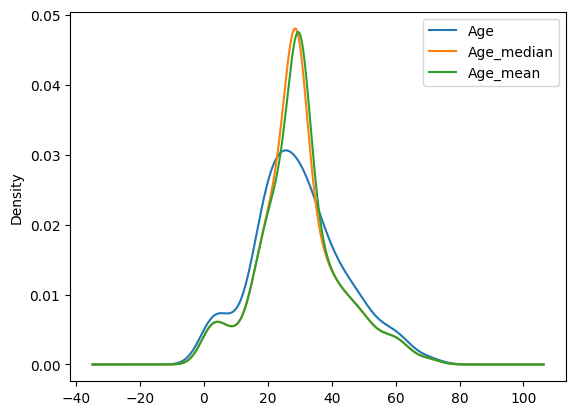

In [26]:
fig = plt.figure()
ax = fig.add_subplot(111)

# Original variable distribution

x_train['Age'].plot(kind = 'kde', ax=ax)

#Variable imputed with the median
x_train['Age_median'].plot(kind = 'kde', ax=ax)

#Variable imputed with the mean
x_train['Age_mean'].plot(kind = 'kde', ax=ax)

# adding legends
lines,labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc = 'best')

# There is very difference between the original and the imputed one---->RED FLAG



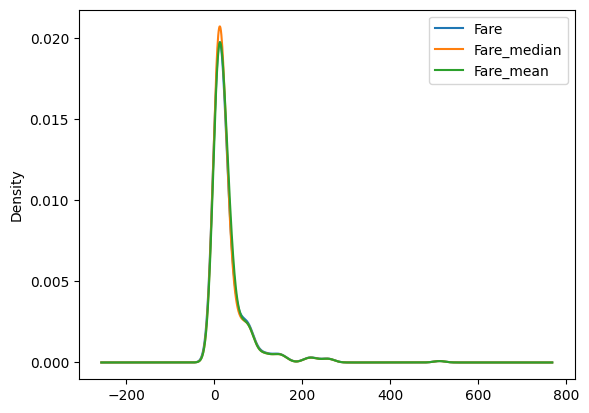

In [27]:
fig = plt.figure()
ax = fig.add_subplot(111)

# Original variable distribution

x_train['Fare'].plot(kind = 'kde', ax=ax)

#Variable imputed with the median
x_train['Fare_median'].plot(kind = 'kde', ax=ax)

#Variable imputed with the mean
x_train['Fare_mean'].plot(kind = 'kde', ax=ax)

# adding legends
lines,labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc = 'best')


## There is almost same distribution---> GREEN FLAG


# Covariance

- Covariance tells how two variables move together.

- If both increase or decrease together → positive covariance.

- If one increases while the other decreases → negative covariance.

- If there’s no clear pattern → covariance is around zero.

- The value can be any number, so it’s hard to compare across datasets.

- It shows direction, but not how strong the relationship is.

In [28]:
x_train.cov()

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
Age,204.349513,70.719262,-6.498901,204.349513,204.349513,64.858859,66.665205
Fare,70.719262,2448.197914,17.258917,57.957599,55.603719,2448.197914,2448.197914
Family,-6.498901,17.258917,2.735252,-5.112563,-5.146106,16.476305,16.385048
Age_median,204.349513,57.957599,-5.112563,161.989566,161.812625,53.553455,55.023037
Age_mean,204.349513,55.603719,-5.146106,161.812625,161.812625,51.358000,52.788341
Fare_median,64.858859,2448.197914,16.476305,53.553455,51.358000,2340.091022,2324.238526
Fare_mean,66.665205,2448.197914,16.385048,55.023037,52.788341,2324.238526,2324.238526


# Correlation

- Correlation tells both direction and strength of the relationship.

- Values are between −1 and +1.

- +1 → perfect positive relationship.

- −1 → perfect negative relationship.

- 0 → no relationship.

- Easier to understand and compare than covariance.

- Correlation is a standardized form of covariance.

In [29]:
x_train.corr()

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
Age,1.000000,0.092644,-0.299113,1.000000,1.000000,0.087356,0.090156
Fare,0.092644,1.000000,0.208268,0.091757,0.088069,1.000000,1.000000
Family,-0.299113,0.208268,1.000000,-0.242883,-0.244610,0.205942,0.205499
Age_median,1.000000,0.091757,-0.242883,1.000000,0.999454,0.086982,0.089673
Age_mean,1.000000,0.088069,-0.244610,0.999454,1.000000,0.083461,0.086078
Fare_median,0.087356,1.000000,0.205942,0.086982,0.083461,1.000000,0.996607
Fare_mean,0.090156,1.000000,0.205499,0.089673,0.086078,0.996607,1.000000


<Axes: >

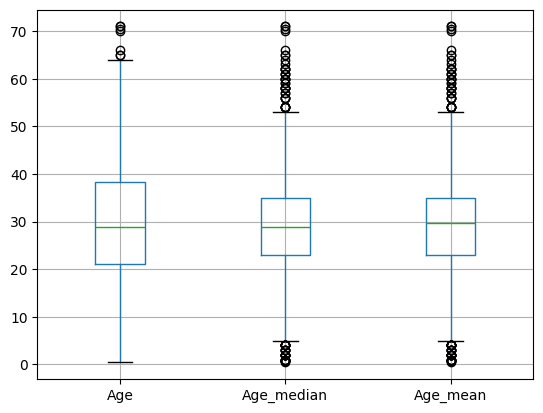

In [30]:
x_train[['Age','Age_median','Age_mean']].boxplot()

<Axes: >

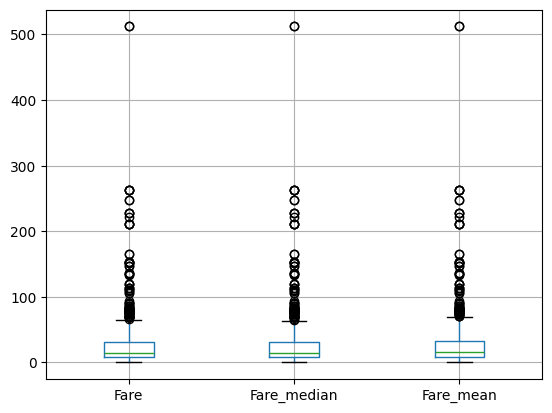

In [31]:
x_train[['Fare','Fare_median','Fare_mean']].boxplot()

# Handling Missing Values Using SKlearn

In [32]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 2)

In [36]:
imputer1 = SimpleImputer(strategy = 'median')
imputer2 = SimpleImputer(strategy = 'mean')


In [37]:
trf= ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Fare'])
],remainder = 'passthrough')

In [38]:
trf.fit(x_train)

,transformers,"[('imputer1', ...), ('imputer2', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'median'
,fill_value,None


In [39]:
trf.named_transformers_['imputer1'].statistics_


array([28.75])

In [40]:
trf.named_transformers_['imputer2'].statistics_


array([32.61759689])

In [41]:
x_train = trf.transform(x_train)
x_test = trf.transform(x_test)

In [42]:
x_train

array([[ 40.    ,  27.7208,   0.    ],
       [  4.    ,  16.7   ,   2.    ],
       [ 47.    ,   9.    ,   0.    ],
       ...,
       [ 71.    ,  49.5042,   0.    ],
       [ 28.75  , 221.7792,   0.    ],
       [ 28.75  ,  25.925 ,   0.    ]], shape=(712, 3))

# Arbitary Value Imputation 


- A method to handle missing values in data.

- Missing values are replaced with a fixed or special value.

- The value is chosen so it does not normally occur in the dataset.

- Helps the model know that the value was originally missing.

# Pros

- Very simple and fast to apply.

- Preserves information about missingness.

- Useful when missing data itself is important.

- No complex calculations needed.

- Works well with tree-based models.

# Cons

- Can distort data distribution.

- May affect distance-based models (e.g., KNN, linear regression).

- Poor choice can introduce bias.

- Not suitable if the arbitrary value overlaps with real data.

# Use Cases

- When missing values have meaning (e.g., “not applicable”).

- Categorical features encoded as numbers.

- When you want the model to detect missing values explicitly.

- In machine learning pipelines for quick preprocessing.

- When combined with a missing indicator variable.

- It is used when the data is not missing in random and is missing in small or large chunks.

# End of Distribution Imputation (EDI)

- Used mainly for numerical data with missing values.

- Idea: Replace missing values with an extreme value from the distribution (usually the max or min).

- Often used when missing values might represent outliers or rare cases.

- Helps the model identify missingness as a separate signal.

- Example: If a feature Age ranges 18–80, missing values might be replaced with 90.

# Pros:

- Simple and quick.

- Helps model recognize missing data.

# Cons:

- Can distort the distribution.

- May introduce unrealistic values.

# Random Sample Imputation (RSI)

- Missing values are replaced by randomly sampling from the existing (observed) values of the feature.

- Idea: Keep the distribution roughly the same.

- Works for both numerical and categorical data.

- Example: If Age has values [20, 25, 30], a missing value could be randomly replaced with 20, 25, or 30.

# Pros:

- Maintains original distribution of the data.

- Simple to implement.

# Cons:

- Randomness can introduce variability in results.

- Not suitable if missingness is not random.